## imports and uploads

In [18]:
from sklearn.datasets import load_breast_cancer as LBC
from sklearn.feature_selection import mutual_info_classif as MIC
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter('ignore')
import os
import colorcet as cc

In [19]:
# upload data
cpath = os.getcwd() #assumes mean_df_females is in the same path as the notebook
mean_df = pd.read_csv(cpath+'/mean_df_female.csv')

# ----------------------------------------------------------------------- 
# ANALYSIS
# -----------------------------------------------------------------------

In [20]:
# plot/colors definitions
# save figures
data_loc=cpath+'/figs/'
try:
    os.mkdir(data_loc)
except FileExistsError:
    # directory already exists
    pass

plt.style.use("seaborn-paper")
phasec = ['#CE3045','#EF7C32','#FFDD00','#939598']
cmap2= ['#EC6D52','#5BA6E6', '#977EDA']

In [21]:
df=mean_df.copy()
data2 = df.groupby(by = ['mouse', 'group','rep','syllable']).mean()['usage'].reset_index()
data = pd.pivot_table(data2, values='usage', index=['group','rep', 'mouse'], columns=['syllable']).reset_index().fillna(0)

In [22]:
### for phase

In [23]:
# prepare data
datan = data.copy()
y = datan['group']
X = datan.drop(columns=['mouse', 'group','rep']).to_numpy()

In [24]:
mi_score_phase = MIC(X,y)
phase_indx = np.argsort(mi_score_phase)[::-1][0:10] # syllble index
impsyl_phase= data2.syllable.unique()[phase_indx] #syllable id
top_mi_score_phase = mi_score_phase[phase_indx]
imp_phase = np.array(['n']*len(mi_score_phase))
imp_phase[np.array(phase_indx)]='y'

In [25]:
print('10 most informative syllables for phase: ',impsyl_phase)

10 most informative syllables for phase:  [15 19 16 12 32 46  5 29 10  9]


In [26]:
### for indv

In [27]:
datan = data.copy()
y = datan['mouse']
X = datan.drop(columns=['mouse', 'group','rep']).to_numpy()

In [28]:
mi_score_indv = MIC(X,y)
indv_indx = np.argsort(mi_score_indv)[::-1][0:10] # syllble index
impsyl_indv= data2.syllable.unique()[indv_indx] #syllable id
top_mi_score_indv = mi_score_indv[indv_indx]
imp_indv = np.array(['n']*len(mi_score_indv))
imp_indv[np.array(indv_indx)]='y'

In [29]:
print('10 most informative syllables for individual: ',impsyl_indv)

10 most informative syllables for individual:  [28 30  8  1 46 40 42 13  5 36]


In [30]:
### for indv and phase interaction

In [31]:
datan = data.copy()
y = datan['mouse'] + datan['group']
X = datan.drop(columns=['mouse', 'group','rep']).to_numpy()

In [32]:
mi_score_inter = MIC(X,y)
inter_indx = np.argsort(mi_score_inter)[::-1][0:10] # syllble index
impsyl_inter= data2.syllable.unique()[inter_indx] #syllable id
top_mi_score_inter = mi_score_inter[inter_indx]
imp_inter = np.array(['n']*len(mi_score_inter))
imp_inter[np.array(inter_indx)]='y'

In [33]:
mi=pd.DataFrame()
syll = list(range(49))
mi['syll'] = syll*3
mi['mi'] = np.concatenate((np.array(mi_score_phase),np.array(mi_score_indv),np.array(mi_score_inter)))
mi['group'] = np.concatenate((len(mi_score_phase) * ['phase'],len(mi_score_indv) * ['individual'],len(mi_score_inter) * ['interaction'])) 
mi['imp'] = np.concatenate((np.array(imp_phase),np.array(imp_indv),np.array(imp_inter)))

No handles with labels found to put in legend.


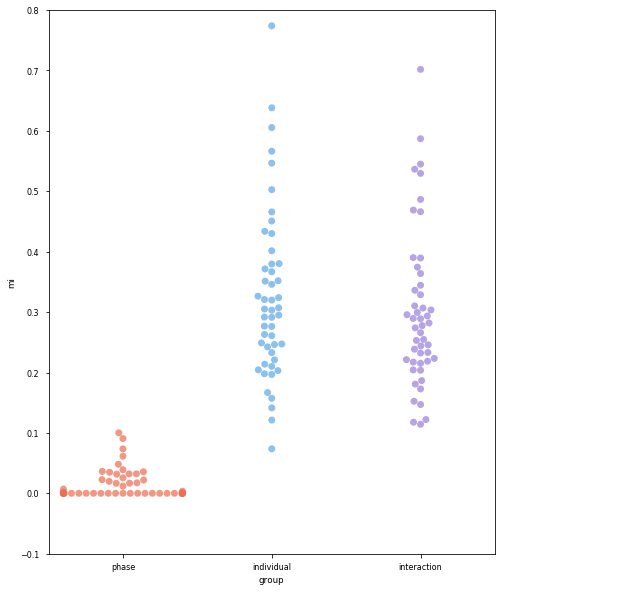

In [34]:
# beeswarm
fig, ax = plt.subplots()
fig.set_size_inches(8,10)
ax.set_ylim([-0.1,0.8])
ax = sns.swarmplot(x="group",y="mi",data=mi, 
                   #hue='syll',palette="rainbow",legend='full', #uncomment to color by syllable
                   alpha=0.7, size=7,  palette = cmap2)
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1.25, 1))
fig.savefig(data_loc +'MI_swarmplot.pdf', bbox_inches='tight')